In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from subprocess import call
from IC.importer import *
from IC.processer import *
from IC.main import sim_events
from functions import ic_params
from src.plotter import P_over_E_parameter, oscillogram, nsi_oscillogram,savethesis
from scipy.stats import chi2
from IC.event_processing import *
import pickle
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)

In [38]:
IC_range = np.logspace(np.log10(500),4,500)

params = ic_params.copy()
param_list = list_of_params(params, [1], [0.04])
zenith = -1

In [39]:
Pam_4gen = P_over_E_parameter('m', param_list, IC_range, ndim=4, anti=True)
Pam_3gen = P_over_E_parameter('m', param_list, IC_range, ndim=3, anti=True)

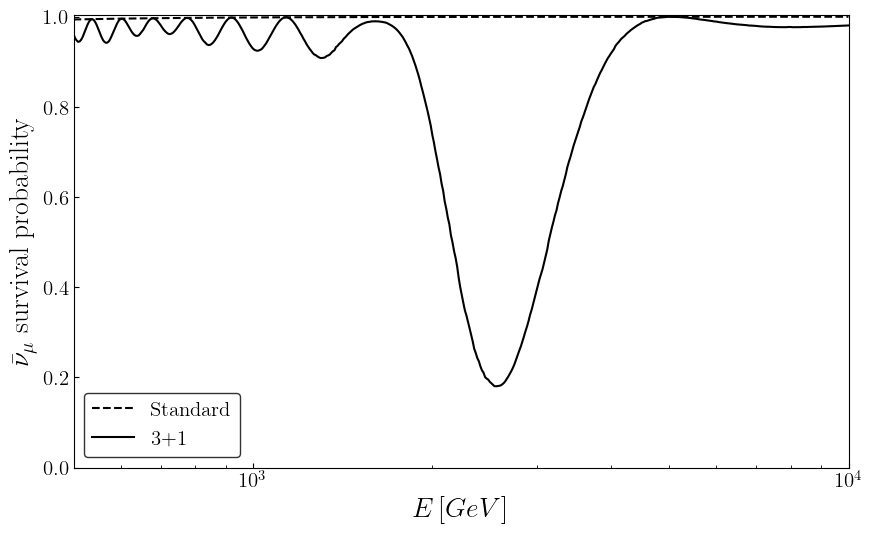

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(IC_range, Pam_3gen[:,1,:].reshape(-1), color='k', ls='dashed', label='Standard')
ax.plot(IC_range, Pam_4gen[:,1,:].reshape(-1), color='k', ls='solid', label='3+1')
ax.set_xlabel(r'$E\,[GeV]$', fontsize=20)
ax.set_ylabel(r'$\bar{\nu}_\mu$ survival probability', fontsize=20)
ax.set_xscale('log')
ax.set_ylim(0,1.005)
ax.set_xlim(500,10000)
leg = ax.legend(fontsize=15)
leg.get_frame().set_edgecolor('k')

ax.tick_params(axis='both', direction='in', which='both')
ax.tick_params(labelsize=15)
savethesis(fig, 'sterile_resonance')

In [41]:
param_list = list_of_params(params, [0.5, 1, 3], [0.04])
Pam_dm = P_over_E_parameter('m', param_list, IC_range, ndim=4, anti=True)
param_list = list_of_params(params, [1], [0.02, 0.04, 0.08])
Pam_th = P_over_E_parameter('m', param_list, IC_range, ndim=4, anti=True)

In [28]:
np.arcsin(np.sqrt(0.02))/2

0.07094852730208195

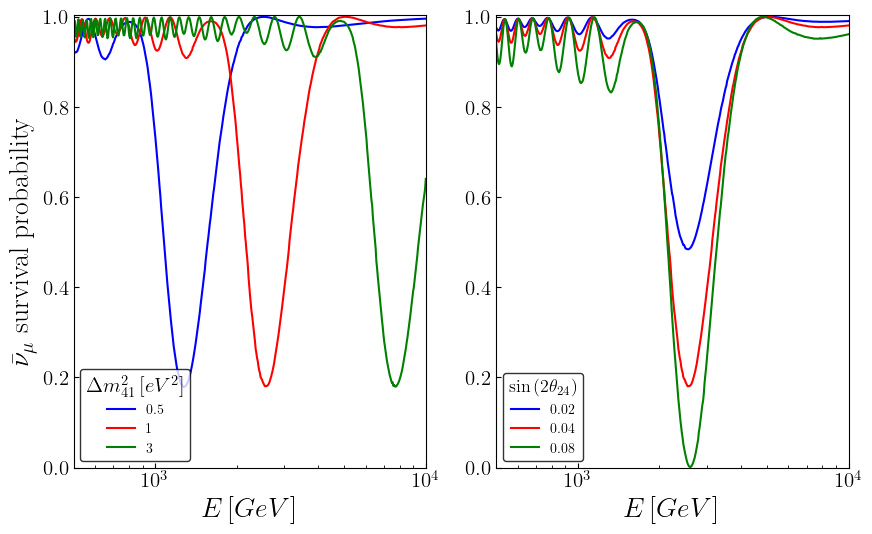

In [57]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(IC_range, Pam_dm[0,1,:].reshape(-1), color='b', ls='solid', label=r'0.5')
ax[0].plot(IC_range, Pam_dm[1,1,:].reshape(-1), color='r', ls='solid', label=r'1')
ax[0].plot(IC_range, Pam_dm[2,1,:].reshape(-1), color='g', ls='solid', label=r'3')
ax[0].set_xlabel(r'$E\, [GeV]$', fontsize=20)
ax[0].set_ylabel(r'$\bar{\nu}_\mu$ survival probability', fontsize=20)
ax[0].set_xscale('log')
ax[0].set_ylim(0,1.005)
ax[0].set_xlim(500,10000)
leg = ax[0].legend(fontsize = 10, title_fontsize=15, title=r'$\Delta m^2_{41}\, [eV^2]$', loc='lower left')
leg.get_frame().set_edgecolor('k')

ax[0].tick_params(axis='both', direction='in', which='both')
ax[0].tick_params(labelsize=15)

ax[1].plot(IC_range, Pam_th[0,1,:].reshape(-1), color='b', ls='solid', label=r'0.02')
ax[1].plot(IC_range, Pam_th[1,1,:].reshape(-1), color='r', ls='solid', label=r'0.04')
ax[1].plot(IC_range, Pam_th[2,1,:].reshape(-1), color='g', ls='solid', label=r'0.08')
ax[1].set_xlabel(r'$E\, [GeV]$', fontsize=20)
ax[1].set_xscale('log')
ax[1].set_ylim(0,1.005)
ax[1].set_xlim(500,10000)
leg = ax[1].legend(fontsize=10, title=r'$\sin{(2\theta_{24})}$', title_fontsize=13)
leg.get_frame().set_edgecolor('k')

ax[1].tick_params(axis='both', direction='in', which='both')
ax[1].tick_params(labelsize=15)
savethesis(fig, 'resonance_shift')